# Jane Chinwuko
# Batch number: DS2307

#### Project Description
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.

#### Attribute Information-
1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: 
#### (class attribute)
•	1- building_windows_float_processed
•	2- building_windows_non_float_processed
•	3- vehicle_windows_float_processed
•	4- vehicle_windows_non_float_processed (none in this database)
•	5- containers
•	6- tableware
•	7- headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 

#### Predict : Type of glass


In [1]:
#Import the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, auc
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score

In [2]:
#Load the dataset from the system
glass_predict = pd.read_csv('glass.csv')

# Exploratory Data Analysis

In [3]:
#Viewing the first 15 rows of the dataset
glass_predict.head(15)

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


We have some columns having 0 value.

In [4]:
#Viewing the last 15 rows of the dataset
glass_predict.tail(15)

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
199,200,1.51609,15.01,0.0,2.51,73.05,0.05,8.83,0.53,0.0,7
200,201,1.51508,15.15,0.0,2.25,73.50,0.00,8.34,0.63,0.0,7
201,202,1.51653,11.95,0.0,1.19,75.18,2.70,8.93,0.00,0.0,7
202,203,1.51514,14.85,0.0,2.42,73.72,0.00,8.39,0.56,0.0,7
203,204,1.51658,14.80,0.0,1.99,73.11,0.00,8.28,1.71,0.0,7
204,205,1.51617,14.95,0.0,2.27,73.30,0.00,8.71,0.67,0.0,7
205,206,1.51732,14.95,0.0,1.80,72.99,0.00,8.61,1.55,0.0,7
206,207,1.51645,14.94,0.0,1.87,73.11,0.00,8.67,1.38,0.0,7
207,208,1.51831,14.39,0.0,1.82,72.86,1.41,6.47,2.88,0.0,7
208,209,1.51640,14.37,0.0,2.74,72.85,0.00,9.45,0.54,0.0,7


This dataset contains 214 rows and 11 columns (made up of the independent and target variables). Type of glass is our target variable.

In [5]:
# Dropping the ID column
glass_predict = glass_predict.drop(columns=['ID'])

Let us drop the ID column at this point because it is not required in this project.

In [6]:
#Viewing the columns present in the dataset
columns = glass_predict.columns
columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of Glass'], dtype='object')

These are what each columns represent:

#### RI: Refractive Index
#### Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
#### Mg: Magnesium
#### Al: Aluminum
#### Si: Silicon
#### K: Potassium
#### Ca: Calcium
#### Ba: Barium
#### Fe: Iron

In [7]:
#Displays the basic information about the columns in the dataset
glass_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             214 non-null    float64
 1   Na             214 non-null    float64
 2   Mg             214 non-null    float64
 3   Al             214 non-null    float64
 4   Si             214 non-null    float64
 5   K              214 non-null    float64
 6   Ca             214 non-null    float64
 7   Ba             214 non-null    float64
 8   Fe             214 non-null    float64
 9   Type of Glass  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


We have 214 entries in our dataset, 9 float64 and 2 int64 datatype

In [8]:
#displaying the descriptive statistics of all the features in the dataset
glass_predict.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


From the above, we can see that the counts are same, so no null values present in our dataset.

In [9]:
# viewing the counts of all columns in our dataset
def columns_values(new_df):
    for i in new_df.columns:
        print(new_df[i].value_counts())
        print('\n')
        
columns_values(glass_predict)

1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64


13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64


0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg, Length: 94, dtype: int64


1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Al, Length: 118, dtype: int64


72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Si, Length: 133, dtype: int64


0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
0.44     1
0.07     1
0.73     1
0.70     1
1.41     1
Name: K, Length: 65, dtype: int64


8.03    5
8.43    5
9.57    4
8.79    

Columns Mg, K, Ba and Fe have values 0. 

In [10]:
#Displays the unique value for the features in the dataset
glass_predict.nunique()

RI               178
Na               142
Mg                94
Al               118
Si               133
K                 65
Ca               143
Ba                34
Fe                32
Type of Glass      6
dtype: int64

In [11]:
#checking for missing values
glass_predict.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of Glass    0
dtype: int64

We do not have any missing value.

In [12]:
#This returns the count of unique occurrences in the Type of Glass column.
glass_predict['Type of Glass'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of Glass, dtype: int64

The counts above represents the class attribute we have in the dataset.

Most of the glasses have attribute 'building_windows_non_float_processed' followed by 'building_windows_float_processed'.

#### Below are the different attributes for each type of glass represented in our dataset.

#### • 1- building_windows_float_processed 
#### • 2- building_windows_non_float_processed 
#### • 3- vehicle_windows_float_processed
#### • 4- vehicle_windows_non_float_processed (none in this database) 
#### • 5- containers 
#### • 6- tableware 
#### • 7- headlamps

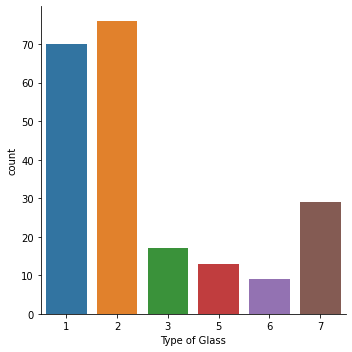

In [13]:
# This catplot shows the distribution of Type of Glass.
sns.catplot(x ='Type of Glass', data = glass_predict, kind = 'count')

We have more glass type with attribute 2 (building_windows_non_float_processed)

<AxesSubplot:>

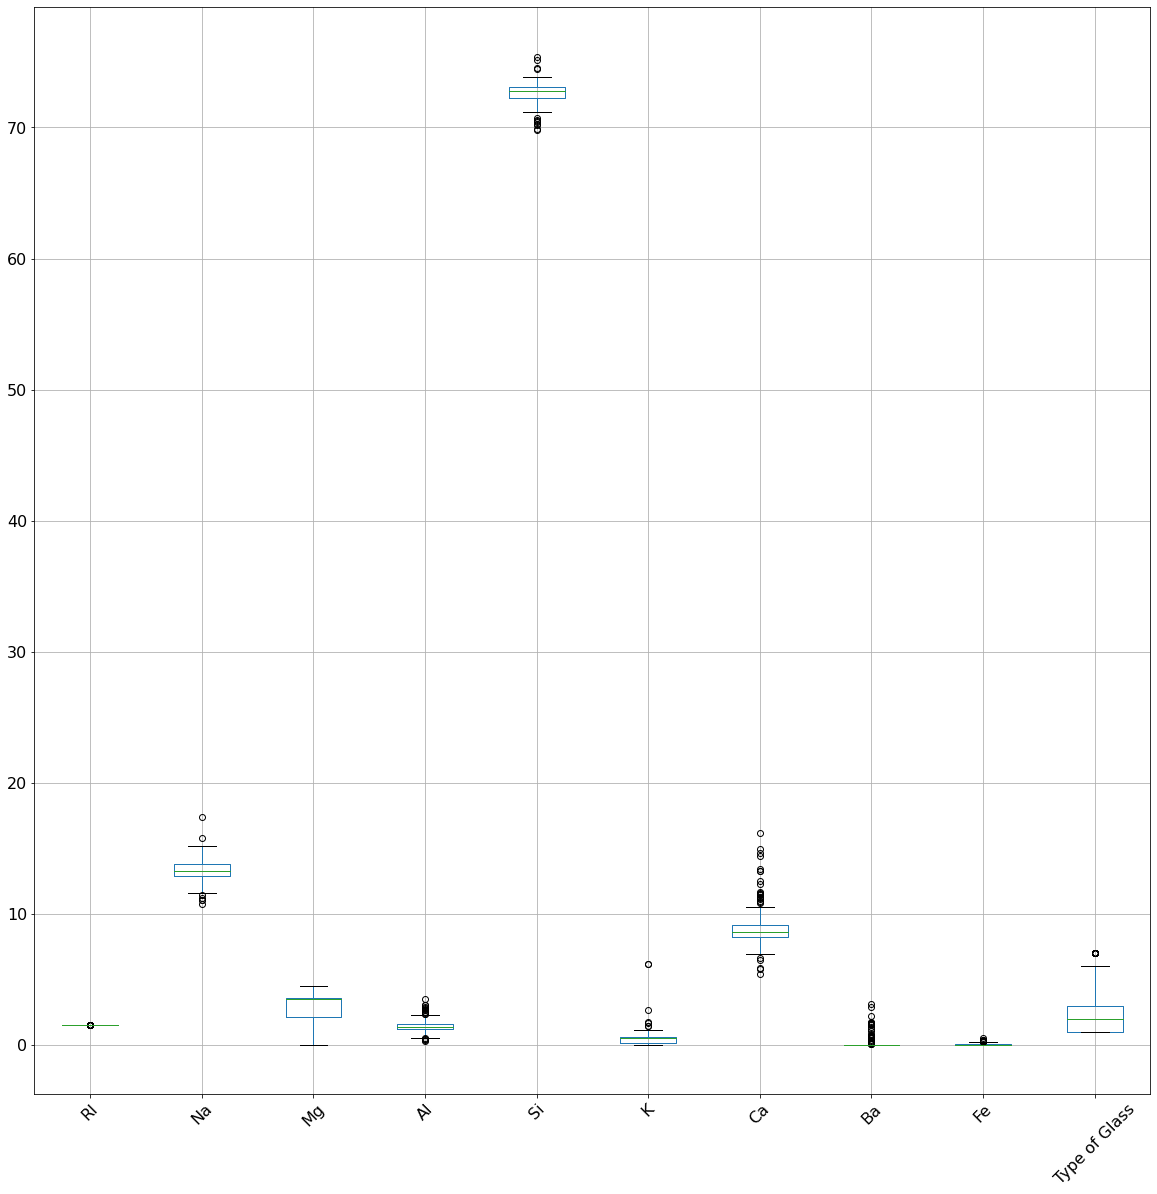

In [14]:
# Boxplot containing all the columns
glass_predict.boxplot(column=glass_predict.columns.tolist(), figsize=(20,20), grid=True, rot=45, fontsize=16)

 Most of the columns have some outliers

In [15]:
# selected columns to check for outliers
columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca','Fe',
       'Type of Glass']

# create an empty list to store values
column_names = []
total_outliers = []
percentage = []
least_outlier = []

outlierFilter=None

# loop through all column list
for column in columns:
    # finding the 1st quartile
    q1 = glass_predict[column].quantile(0.25)

    # finding the 3rd quartile
    q3 = glass_predict[column].quantile(0.75)

    # get the column minimum and median values
    min_value = glass_predict[column].min()
    median_value = glass_predict[column].median()

    # finding the iqr region
    iqr = q3-q1

    # finding upper and lower whiskers
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)

    # Get the array data for wine_red
    arr1 = glass_predict[column]

    # Get the outliers in the columns using the upper and lower whiskers
    outliers = arr1[(arr1 <= lower_bound) | (arr1 >= upper_bound)]
    
    # get the min value of the outliers found
    min_value = round(min(outliers.values)) if len(outliers.values) > 0 else 0
    
    # calculate the percentage of the outliers found
    percentage_value = round((len(outliers.values) / len(arr1)) * 100, 2) if len(outliers.values) > 0 else 0
    
    # add values to the list
    column_names.append(column)
    total_outliers.append(len(outliers.values))
    least_outlier.append(min_value)
    percentage.append(percentage_value)
    
    # do this if outliers is less than or equal to 5%
    if round(percentage_value) <= 5 and len(outliers.values) > 0:
        # capping Outliers using IQR Ranges
        glass_predict.loc[(glass_predict[column] <= lower_bound), column] = lower_bound
        glass_predict.loc[(glass_predict[column] >= upper_bound), column] = upper_bound
        
    # do this if outliers is greater than 5%
    elif round(percentage_value) > 5 and len(outliers.values) > 0:
        # replacing outlier values with the median value
        glass_predict.loc[(glass_predict[column] <= lower_bound), column] = median_value
        glass_predict.loc[(glass_predict[column] >= upper_bound), column] = median_value


print('Outliers Table Summary')

# create a new dictionary
new_dict = {'Column Name': column_names, 'Number of Outliers': total_outliers, 'Least Value': least_outlier, 'Percentage Value': percentage}
# create a new dataframe table
new_df = pd.DataFrame(new_dict)
# display the new dataframe table
new_df

Outliers Table Summary


,Column Name,Number of Outliers,Least Value,Percentage Value
0,RI,17,2,7.94
1,Na,7,11,3.27
2,Mg,0,0,0.00
3,Al,18,0,8.41
4,Si,12,70,5.61
5,K,7,1,3.27
6,Ca,26,5,12.15
7,Fe,13,0,6.07
8,Type of Glass,38,6,17.76


<AxesSubplot:>

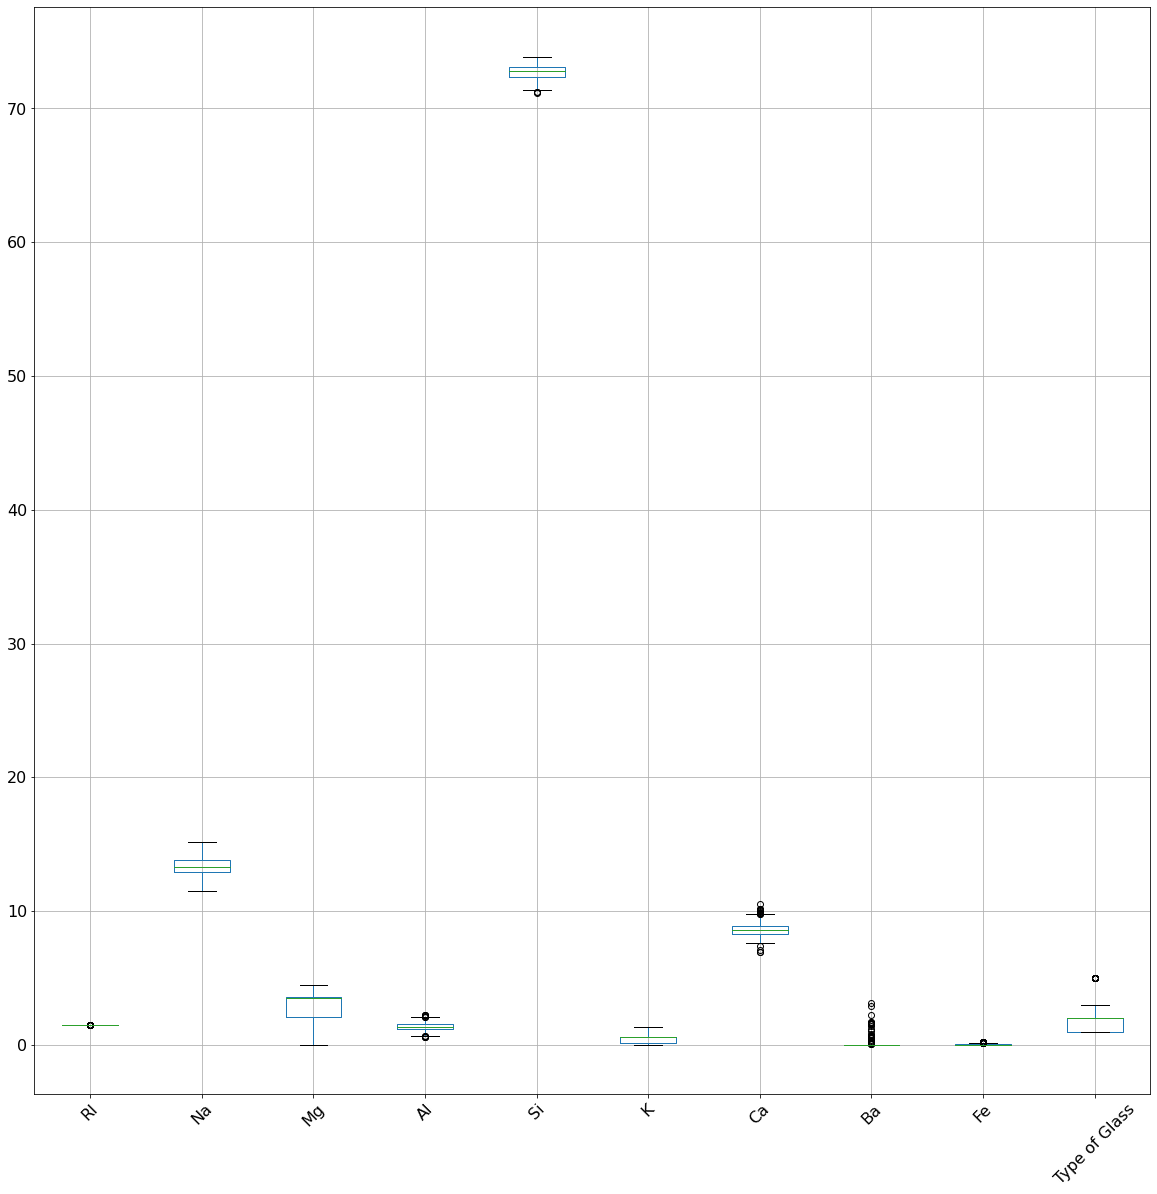

In [16]:
# Boxplot containing all the columns
glass_predict.boxplot(column=glass_predict.columns.tolist(), figsize=(20,20), grid=True, rot=45, fontsize=16)

From the above, we checked and displayed the number of outliers present in our dataset. If these outliers are removed, it will reduce the dimension of our dataset greatly. 

We treated them by:
1) Replacing outlier values with the median value if the percentage value is greater than 5%. 
2) Capping the Outliers using IQR Ranges if the percentage value is less than 5%.

In [17]:
#Categorizing the Type of glass variable into binary classification
glass_predict['Type of Glass'] = glass_predict['Type of Glass'].apply(lambda x: 0 if x<= 4 else 1)
glass_predict


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,1.36,72.61,0.08,9.18,1.06,0.0,0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,0


#### We scaled our type of glass column into 2 (window glass (classes 1-4) and non-window glass (classes 5-7)

#### 0  is for window glass  and 1 is for non-window glass

In [18]:
#checking the VIF value for multicollinearity between our variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X_input):
# Calculating VIF
    vif_df = pd.DataFrame()
    vif_df["Variables"] = X_input.columns
    vif_df["VIF Value"] = [variance_inflation_factor(X_input.values, i) for i in range(X_input.shape[1])]

    return(vif_df)
X = glass_predict.iloc[:,:-1]
calc_vif(X)

,Variables,VIF Value
0,RI,29414.166718
1,Na,595.780001
2,Mg,7.868904
3,Al,26.694540
4,Si,23652.471064
5,K,5.746885
6,Ca,334.103651
7,Ba,1.859379
8,Fe,1.393902


In [19]:
#Dropping RI (has highest vif value)
X = glass_predict.drop(['RI','Type of Glass'],axis=1)

calc_vif(X)

,Variables,VIF Value
0,Na,486.932605
1,Mg,7.078670
2,Al,26.582779
3,Si,725.248018
4,K,5.586236
5,Ca,252.709049
6,Ba,1.819885
7,Fe,1.381240


We dropped the RI column because it  had a higher VIF value. We still have high value. We shall drop Si next.

In [20]:
#Dropping columns having highest vif value
X = glass_predict.drop(['RI','Si','Na','Ca','Type of Glass'],axis=1)
y = glass_predict['Type of Glass']
calc_vif(X)

,Variables,VIF Value
0,Mg,5.031085
1,Al,6.128802
2,K,3.810297
3,Ba,1.663404
4,Fe,1.298956


After dropping Si, we still had high vif values. So, we had to drop Na and Ca also before we were able to get vif value less than 10.

In [21]:
#Standardization of a dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X)
X_test=sc.transform(X)
tabel_col = X.columns
x = pd.DataFrame(X_train, columns = tabel_col)
x

,Mg,Al,K,Ba,Fe
0,1.254639,-0.841254,-1.244720,-0.352877,-0.539951
1,0.636168,-0.070255,0.128174,-0.352877,-0.539951
2,0.601422,0.463514,-0.166017,-0.352877,-0.539951
3,0.698710,-0.277831,0.422366,-0.352877,-0.539951
4,0.650066,-0.426100,0.356990,-0.352877,-0.539951
...,...,...,...,...,...
209,-1.865511,-0.070255,-1.179344,1.783978,-0.539951
210,-1.865511,1.797936,-1.440848,2.852405,-0.539951
211,-1.865511,1.886898,-1.440848,2.953200,-0.539951
212,-1.865511,1.649667,-1.440848,2.812087,-0.539951


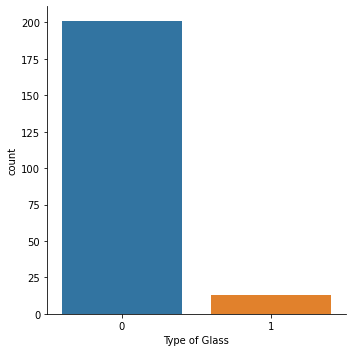

In [22]:
# This catplot shows the distribution of type of glass.
sns.catplot(x ='Type of Glass', data = glass_predict, kind = 'count')

We can see that there is a great difference between the two classes. We shall use the SMOTE algorithm to balance the count

In [23]:
from imblearn.over_sampling import SMOTE
#Used oversampling to handling imbalance in the Type of Glass column
glass_sm = SMOTE()
X_res, y_res = glass_sm.fit_resample(x, y)
y_res.value_counts()

0    201
1    201
Name: Type of Glass, dtype: int64

<AxesSubplot:xlabel='Type of Glass', ylabel='count'>

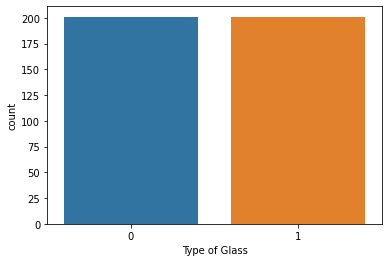

In [24]:
#Display of the Type of Glass count after balancing.
sns.countplot(x=y_res)

We can see that the counts of Type of Glass are now balanced.

In [25]:
# splitting the features into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.20, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((321, 5), (81, 5), (321,), (81,))

We splitted our dataset into train and test. We used 80% of our data to train the models and use 20% to validate the performance of our model. We have 321 data in our training. 81 data will be used validation. We are left with 5 variables after data cleansing

DecisionTreeClassifier(criterion='entropy')
Feature: 0, Score: 0.52335
Feature: 1, Score: 0.05426
Feature: 2, Score: 0.29644
Feature: 3, Score: 0.06025
Feature: 4, Score: 0.06571


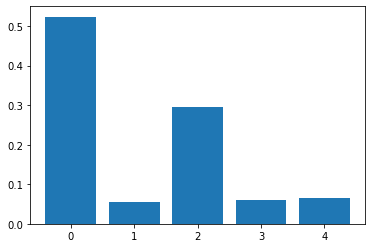

In [26]:
# feature importance using decision tree classifier
decisionTree = DecisionTreeClassifier(criterion='entropy')

print(decisionTree)

dtc_model = decisionTree.fit(X_train, y_train)

importance = dtc_model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# Barchat for feature importance
pyplot.bar([x for x in range(len(importance))], importance)

pyplot.show()

features/columns: [0:'Mg', 1: 'Al', 2: 'K', 3:'Ba', 4:'Fe']

From the feature importance barplot displayed above, we can see that Mg is returned as the most important feature. We shall be training our model with all 5 features so we have more data to train with.

# Building of Model

## 1. Decision Tree

In [27]:
# Create a Decision Tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"The Accuracy for Decision Tree: {accuracy:.2f}")
print('\n')
# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Decision Tree: 0.99


[[44  1]
 [ 0 36]]


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.97      1.00      0.99        36

    accuracy                           0.99        81
   macro avg       0.99      0.99      0.99        81
weighted avg       0.99      0.99      0.99        81



### Cross Validation Score for Decision Tree

In [28]:
# Specify the cross-validation strategy
results = []

scores = cross_val_score(dt, X_train, y_train,cv=5)
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")
print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Decision Tree',accuracy, mean_score, diff])

Cross-validation scores: [0.98461538 0.984375   1.         0.984375   0.953125  ]
Mean accuracy: 0.98


The difference between the accuracy score and the cross validation score is: 0.006356244064577354


## 2. Random Forest

In [29]:
# Create a Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"The Accuracy for Random Forest is: {accuracy:.2f}")
print('\n')
# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Random Forest is: 1.00


[[45  0]
 [ 0 36]]


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        36

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81



#### Cross Validation Score for Random Forest

In [30]:

scores = cross_val_score(rf, X_train, y_train,cv=5)  # You can choose a different scoring metric
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")
print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Random Forest',accuracy, mean_score, diff])

Cross-validation scores: [1.       1.       1.       0.953125 0.96875 ]
Mean accuracy: 0.98


The difference between the accuracy score and the cross validation score is: 0.015625


## 3. Logistic Regression

In [31]:
# Create a Logistic Regression classifier
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, lr_pred)
print(f"The Accuracy for Logistic Regression is: {accuracy:.2f}")
print('\n')
# Display a classification report for more detailed metrics
report = classification_report(y_test, lr_pred)
print(confusion_matrix(y_test, lr_pred))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Logistic Regression is: 0.98


[[43  2]
 [ 0 36]]


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        45
           1       0.95      1.00      0.97        36

    accuracy                           0.98        81
   macro avg       0.97      0.98      0.98        81
weighted avg       0.98      0.98      0.98        81



#### Cross Validation Score for Logistic Regression

In [32]:

scores = cross_val_score(lr, X_train, y_train,cv=5)  # You can choose a different scoring metric
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")

print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Logistic Regression',accuracy, mean_score, diff])

Cross-validation scores: [0.96923077 0.96875    0.921875   0.9375     0.96875   ]
Mean accuracy: 0.95


The difference between the accuracy score and the cross validation score is: 0.02208748812915473


## 4. Adaboost classifier

In [33]:
# Create a Adaboost Classifier
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)

y_pred_ab = ab.predict(X_test)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_ab)
print(f"The Accuracy for Adaboost classifier is: ",accuracy)
print('\n')

# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred_ab)
print(confusion_matrix(y_test, y_pred_ab))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Adaboost classifier is:  0.9753086419753086


[[44  1]
 [ 1 35]]


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        45
           1       0.97      0.97      0.97        36

    accuracy                           0.98        81
   macro avg       0.97      0.97      0.97        81
weighted avg       0.98      0.98      0.98        81



#### Cross Validation Score for Adaboost classifier

In [34]:

scores = cross_val_score(ab, X_train, y_train,cv=5) 
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")

print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Adaboost classifier',accuracy, mean_score, diff])

Cross-validation scores: [0.98461538 0.96875    1.         0.96875    0.96875   ]
Mean accuracy: 0.98


The difference between the accuracy score and the cross validation score is: -0.002864434947768335


## 5. Gradient Boosting Classifier

In [35]:
# Create a Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_gb)
print(f"The Accuracy for Gradient Boosting Classifier is: ",accuracy)
print('\n')

# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred_gb)
print(confusion_matrix(y_test, y_pred_gb))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Gradient Boosting Classifier is:  0.9876543209876543


[[45  0]
 [ 1 35]]


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       1.00      0.97      0.99        36

    accuracy                           0.99        81
   macro avg       0.99      0.99      0.99        81
weighted avg       0.99      0.99      0.99        81



#### Cross Validation Score for Gradient Boosting Classifier

In [36]:

scores = cross_val_score(gb, X_train, y_train, cv=5) 
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")

print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Gradient Boosting Classifier', accuracy, mean_score, diff])

Cross-validation scores: [0.98461538 0.984375   0.984375   0.96875    0.953125  ]
Mean accuracy: 0.98


The difference between the accuracy score and the cross validation score is: 0.012606244064577332


#### Difference between accuracy and Cross Validtion Score

In [37]:
# create dataframe for all the accuracy scores and cross validation score for the models used
df = pd.DataFrame(results, columns=['Algorithm', 'Accuracy Score','Cross Validation Score', 'Difference btw accuracy and Cross Validtion Score'])
df

,Algorithm,Accuracy Score,Cross Validation Score,Difference btw accuracy and Cross Validtion Score
0,Decision Tree,0.987654,0.981298,0.006356
1,Random Forest,1.000000,0.984375,0.015625
2,Logistic Regression,0.975309,0.953221,0.022087
3,Adaboost classifier,0.975309,0.978173,-0.002864
4,Gradient Boosting Classifier,0.987654,0.975048,0.012606


#### Selection of the best model

In [38]:
#Selection of the best model based on the difference between the accuracy and cross validation score
least_value = min(df['Difference btw accuracy and Cross Validtion Score'].tolist())
best_model = df.loc[(df['Difference btw accuracy and Cross Validtion Score']) == least_value, 'Algorithm']
best_model = ' '.join(str(best_model).split()[1:-4])
print('From the table above, my best model is the', best_model)

From the table above, my best model is the Adaboost classifier


#### ROC curve  and AUC of the best model

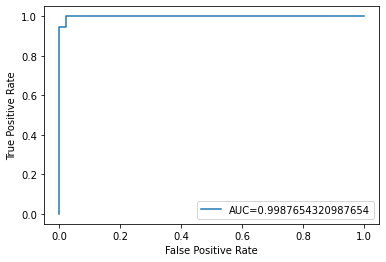

In [39]:
#ROC plot of the best model
import sklearn.metrics as metrics
#define metrics
y_pred_proba = ab.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

From the ROC curve above, we can see that the AUC value for our best model is 99.87%

In [40]:
from sklearn.model_selection import GridSearchCV

model_best = AdaBoostClassifier()

model_param = {"base_estimator":[None],
    "random_state":[0],
    "learning_rate":[0.01,0.001, 0.1, 1.0],
    "n_estimators":[10, 50, 100, 500]
    }

In [41]:
gd_search = GridSearchCV(model_best, model_param, cv = 5)

gd_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'base_estimator': [None],
                         'learning_rate': [0.01, 0.001, 0.1, 1.0],
                         'n_estimators': [10, 50, 100, 500],
                         'random_state': [0]})

In [42]:
#display the best parameters from the search

print("The best learning_rate is : " + str(gd_search.best_params_["learning_rate"]),
     "\nThe best base_estimator: " + str(gd_search.best_params_["base_estimator"]),
     "\nThe best random_state: " + str(gd_search.best_params_["random_state"]),
     "\nThe best n_estimators: " + str(gd_search.best_params_["n_estimators"]))

The best learning_rate is : 0.01 
The best base_estimator: None 
The best random_state: 0 
The best n_estimators: 100


In [47]:
# train the model with the selected parameters
wine_model = AdaBoostClassifier(n_estimators  = 100, base_estimator = None , learning_rate = 0.01  , random_state = 0)
wine_model.fit(X_train, y_train)
y_pred = wine_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9876543209876543

In [48]:
import pickle
# save the model to disk
filename = 'glass_predict.sav'
pickle.dump(wine_model, open(filename, 'wb'))

In [49]:
#prediction using our saved model
load_model = pickle.load(open(filename, 'rb'))
accuracy_dataframe = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
accuracy_dataframe

,Actual,Predicted
285,1,1
281,1,1
33,0,0
211,0,0
93,0,0
...,...,...
228,1,1
371,1,1
176,0,0
272,1,1


we can see that from the 10 predictions made, the model was able to predict all correctly. 

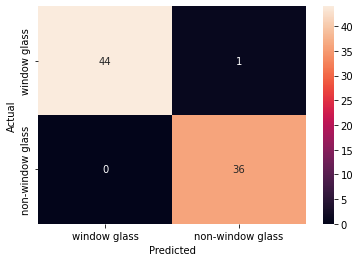

In [50]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
label=['window glass', 'non-window glass']
sns.heatmap(matrix, annot=True, fmt='d', xticklabels=label, yticklabels=label,)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Conclusion

Adaboost classifier is our best model because it had a lower difference between accuracy and cross validation score. The accuracy score before tuning was 0.975309 and after tuning with set parameters, the model's accuracy increased to 0.987654. There was an improvement in the accuracy after tuning. 
Testing the performance of the model, we can see that predictions made were correct. We can also see in the confusion matrix that the model predicted 44 window glass and it was actually window glass(True positive). It predicted 36 were non-window glass(True negative) and it was actually non-window glass. For a better model performance, we will need to train with more data.